Notons $\nu$ la mesure image de $\mu$ par T .  
Par définition de la mesure image on a :   
$\forall f \quad \nu-intégrable  : \quad  \int_{\mathbb{R}} f \, d\nu = \int_{\mathbb{R}} (f \circ T) \, d\mu
= \int_{\mathbb{R}} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx 
=\int_{\mathbb{R}^+} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx + \int_{\mathbb{R}^-} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx
\stackrel{Parité}{=}2\int_{\mathbb{R}^+} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx 
\stackrel{Chgt.var}{=}\int_{\mathbb{R}^+} f(x) \cdot \frac{1}{\sqrt{2\pi x}} \exp(\frac{-x}{2}) dx
$ 

  
Ainsi : $\nu$ est la loi de densité $x \mapsto \frac{1}{\sqrt{2\pi x}} \cdot \exp(\frac{-x}{2}) \mathbf{1}_{\mathbb{R}^+}(x)$    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as sps


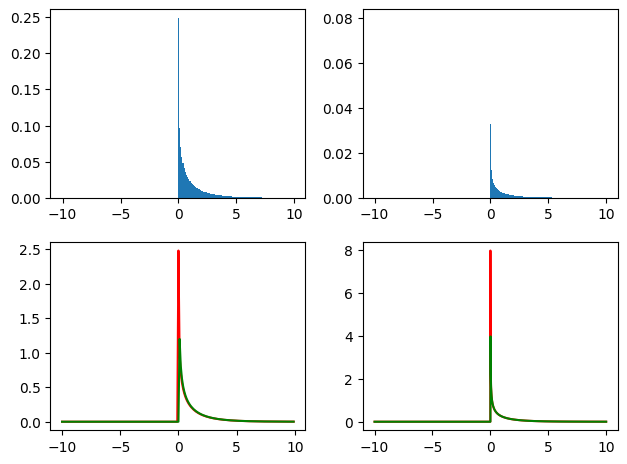

In [6]:
fig,ax=plt.subplots(2,2)
fig.tight_layout()
eps1=0.1
eps2=0.01
seg1=np.arange(-10,10,eps1)
seg2=np.arange(-10,10,eps2)
def mass(a,eps):
    b = a+eps
    if(b<0):
        return 0
    if(a<0):
        a=0
    a=np.sqrt(a)
    b=np.sqrt(b)
    return 2*(sps.norm.cdf(b)-sps.norm.cdf(a))  
res1 = np.array([mass(i,eps1) for i in seg1])
res2 = np.array([mass(i,eps2) for i in seg2])

dens1 = [i/eps1 for i in res1]
dens2 = [i/eps2 for i in res2]

def funcTheorique(x):
    if(x<=0):
        return 0
    return 1/np.sqrt(2*np.pi*x)*np.exp(-x/2)

theo1 = [funcTheorique(i) for i in seg1]
theo2 = [funcTheorique(i) for i in seg2]
#ax1=plt.subplot(11)
#ax2=plt.subplot(12)
ax[0,0].bar(seg1,res1,width=eps1)
ax[1,0].plot(seg1,dens1,color='red')
ax[1,0].plot(seg1,theo1,color='green')
#plt.ylim([0,0.03])
ax[0,1].bar(seg2,res2,width=eps2)
ax[1,1].plot(seg2,dens2,color='red')
ax[1,1].plot(seg2,theo2,color='green')

  